# Heart Attack Analysis & Prediction Dataset

Об этом наборе данных
Возраст : Возраст пациента

sex: Пол пациента

exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

ca: количество крупных сосудов (0-3)

cp : Тип боли в груди Тип боли в груди

Значение 1: типичная стенокардия
Значение 2: атипичная стенокардия
Значение 3: неангинозная боль
Значение 4: бессимптомный
trtbps: артериальное давление в покое (в мм рт. ст.)

chol : холестораль в мг/дл, полученный с помощью датчика ИМТ

fbs: (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = неверно)

rest_ecg : результаты электрокардиографии в покое

Значение 0: нормальный
Значение 1: наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ)
Значение 2: указание на возможную или определенную гипертрофию левого желудочка по критериям Эстеса.
thalach: достигнута максимальная частота сердечных сокращений

output: 
0 = меньше вероятность сердечного приступа 
1 = больше вероятность сердечного приступа

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc

In [13]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum() # пропущенных значений не имеется

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# Там, где значения являются числовым типом, 
# а не типом категорий необходимо избавиться от выбросов


In [8]:
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

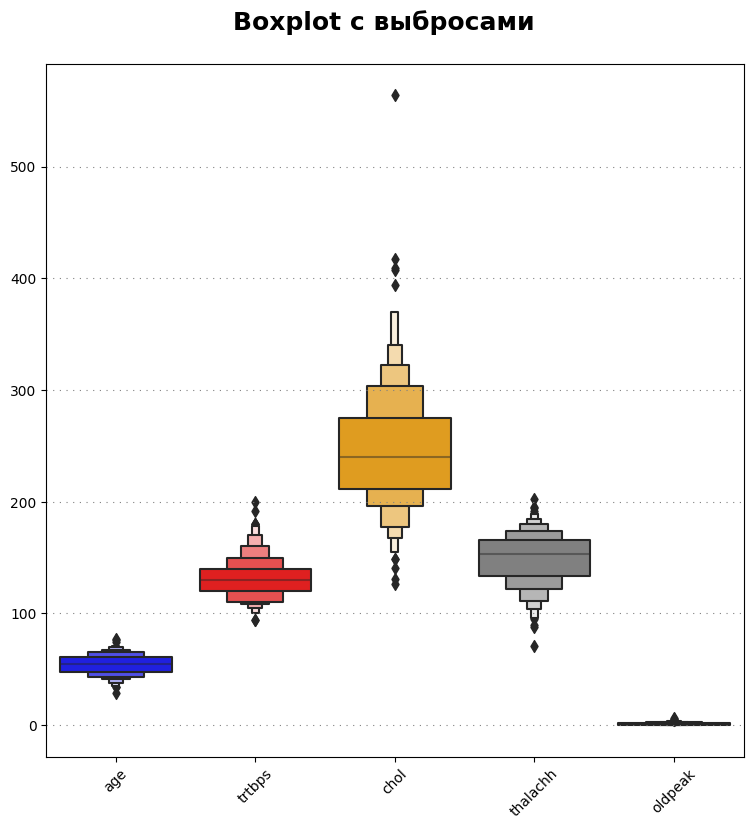

In [14]:
colors = ['blue','red','orange','grey','purple']
plt.figure(figsize=(9,9))
plt.suptitle("Boxplot с выбросами",y=0.94, size=18, weight='bold')
sns.boxenplot(data = df[numerical_cols],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

In [15]:
for i in df[numerical_cols]: # Коррекция выбросов методом межквартильного размаха
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    for j in df[i]:
        if j > upper_limit:
            df[i] = df[i].replace(j, upper_limit)
        if j < lower_limit:
            df[i] = df[i].replace(j, lower_limit)

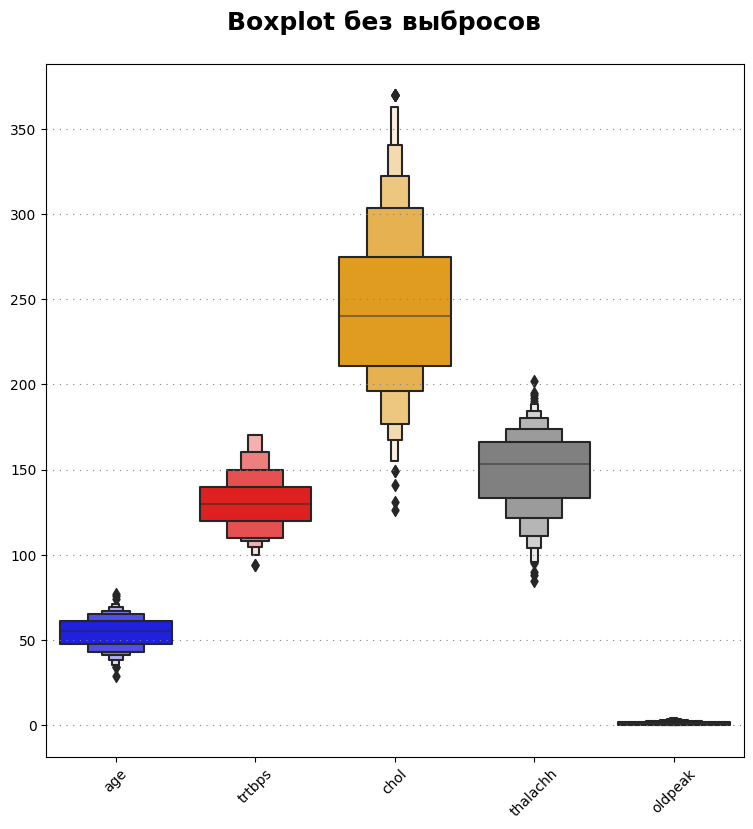

In [16]:
colors = ['blue','red','orange','grey','purple']
plt.figure(figsize=(9,9))
plt.suptitle("Boxplot без выбросов",y=0.94, size=18, weight='bold')
sns.boxenplot(data = df[numerical_cols],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

**Предварительная обработка данных**

In [13]:
# разобьём датасет на матрицу признаков и вектор целевой переменной
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Разделение данных на обучающую выборку и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [16]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (242, 13)
Number transactions y_train dataset:  (242,)
Number transactions x_test dataset:  (61, 13)
Number transactions y_test dataset:  (61,)


In [17]:
# Масштабирование с использованием метода стандартного масштабирования
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**KNN**

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

ROC AUC score: 0.9084967320261438
Accuracy Score:  0.8360655737704918


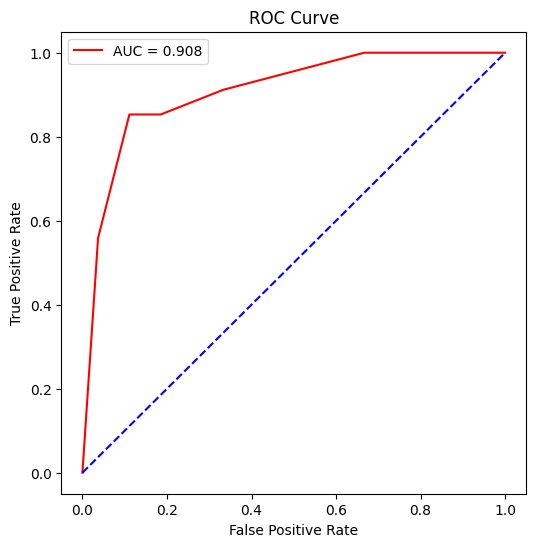

In [21]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

# График ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6, 6))
plt.plot(false_positive_rate,
         true_positive_rate,
         color='red',
         label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Выводы:
- Класс 1 - у человека высокий шанс получить сердечный приступ
- Класс 0 - у человека низкий шанс получить сердечный приступ
- Classification Report показывает метрики precision, recall и f1-score для каждого класса (0 и 1), а также средние значения по всем классам.
- Precision (точность) оценивает, как много из предсказанных положительных меток действительно являются положительными. Значение 0.81 для класса 0 и 0.85 для класса 1 означает, что около 81% наблюдений, предсказанных как класс 0, являются действительно классом 0, а около 85% наблюдений, предсказанных как класс 1, являются действительно классом 1.
- Recall (полнота) оценивает, как много из фактических положительных меток было правильно предсказано моделью. Значение 0.81 для класса 0 и 0.85 для класса 1 означает, что модель обнаружила около 81% от всех наблюдений, принадлежащих к классу 0, и около 85% от всех наблюдений, принадлежащих к классу 1.
- F1-score является гармоническим средним между precision и recall и представляет собой метрику, объединяющую обе эти характеристики. Значение 0.81 для класса 0 и 0.85 для класса 1 указывает на баланс между точностью и полнотой модели для обоих классов.
- Support представляет собой количество наблюдений, относящихся к каждому классу. В данном случае, для класса 0 support равен 27, а для класса 1 support равен 34.
- ROC AUC Score равен 0.908, что указывает на высокую способность модели разделять классы.
- Accuracy Score равен 0.836, что означает, что модель правильно классифицировала около 83.6% наблюдений в тестовой выборке.

В целом, результаты указывают на хорошую производительность модели классификации. Значения precision, recall и f1-score высоки как для класса 0, так и для класса 1, что указывает на способность модели правильно идентифицировать оба класса. Accuracy Score также достаточно высок, что указывает на общую точность модели в классификации данных.

**Дерево решений**

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.74      0.78        34

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

ROC AUC score: 0.7750544662309369
Accuracy Score:  0.7704918032786885


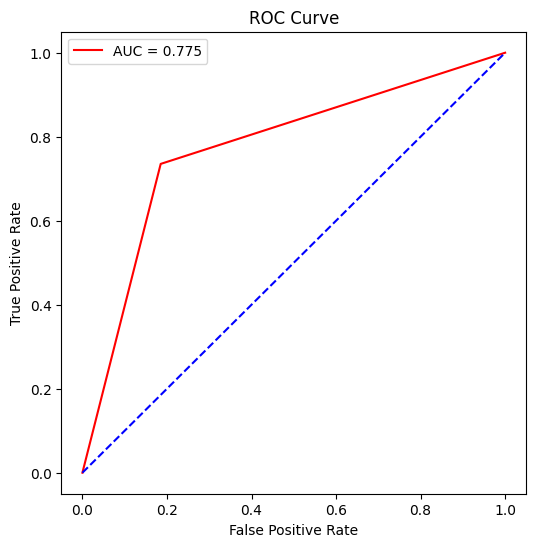

In [23]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

# График ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6, 6))
plt.plot(false_positive_rate,
         true_positive_rate,
         color='red',
         label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Выводы:

В целом, результаты показывают, что модель дерева решений имеет неплохую производительность, хотя некоторые метрики могут быть немного ниже по сравнению с предыдущей моделью KNN. Precision, recall и f1-score для обоих классов достаточно высоки, хотя для класса 0 recall немного выше, чем для класса 1. Accuracy Score также достаточно высокий, что указывает на общую точность модели в классификации данных. Однако, ROC AUC Score показывает, что модель имеет среднюю способность разделять классы.